# Задание на практику
1. Найти и выгрузить многомерные данные с использованием
библиотеки pandas. В отчёте описать найденные данные.
2. Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.
3. Построить столбчатую диаграмму (.bar) с использованием
библиотеки Plotly со следующими параметрами:
   3.1. По оси Х указать дату или название, по оси У указать количественный
показатель.
3.2 Сделать так, чтобы столбец принимал цвет в зависимости от значения
показателя (marker=dict(color=признак, coloraxis="coloraxis")).
3.3 Сделать так, чтобы границы каждого столбца были выделены чёрной
линией с толщиной равной 2.
3.4 Отобразить заголовок диаграммы, разместив его по центру сверху, с
20 размером текста.
3.5 Добавить подписи для осей X и Y с размером текста, равным 16. Для
оси абсцисс развернуть метки так, чтобы они читались под углом,
равным 315.
3.6 Размер текста меток осей сделать равным 14.
3.7. Расположить график во всю ширину рабочей области и присвоить
высоту, равную 700 пикселей.
3.8. Убрать лишние отступы по краям.
4. Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2.
5. Построить линейный график накопленных значений количественного
показателя.
5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет
точек 'white', цвет границ точек 'black', толщина границ точек равна 2.
5.2. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2.
(Можно сделать это при настройке осей с помощью gridwidth=2,
gridcolor='ivory').
6. Постараться создать аналогичные графики с использованием
библиотеки matplotlib.
7. На основе проделанной работы составить отчёт с описанием и
скриншотами полученных результатов, сделать выводы о выбранном
организации (процессе) на основе полученных графиков, сравнить
библиотеки.

In [225]:
import pandas as pd

In [226]:
data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


(   sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5           1.4          0.2  setosa
 1           4.9          3.0           1.4          0.2  setosa
 2           4.7          3.2           1.3          0.2  setosa
 3           4.6          3.1           1.5          0.2  setosa
 4           5.0          3.6           1.4          0.2  setosa,
 None)

In [227]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [228]:
import plotly.graph_objects as go
import plotly.express as px

In [229]:
fig = px.bar(data[['sepal_length', 'species']], x="species", y='sepal_length', color="sepal_length", title='Sepal length diagram')
fig.update_traces(marker=dict(line=dict(color="black", width=2)))
fig.update_layout(title_font_size=20, xaxis_tickangle=315,
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14,
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(l=0, r=0, t=50, b=0),
                  width=None, height=500)
fig.show()

In [237]:
fig = px.pie(data, values='petal_length', names='species',
         title='Petal width diagram')
fig.update_traces(marker=dict(line=dict(color="black", width=2)))
fig.update_layout(title_font_size=20, xaxis_tickangle=315,
                  xaxis_tickfont_size=14, yaxis_tickfont_size=14,
                  xaxis_title_font_size=16, yaxis_title_font_size=16,
                  margin=dict(l=0, r=0, t=50, b=0),
                  width=None, height=500)
fig.show()

In [242]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[data['species'] == 'setosa']['petal_length'].sort_values(),
                         y=data[data['species'] == 'setosa']['sepal_length'].sort_values(),
                         mode='lines+markers',
                         name='lines+markers'))
fig.update_traces(
    marker=dict(size=16, color='white', line=dict(color='black', width=2)),
    line=dict(color='crimson')
)
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='ivory')
fig.update_layout(
    title="Dependence of petal length\n on the sepal length of the setosa species",
    title_font_size=20,
    title_x=0.5,
    xaxis_title='Date',
    xaxis_title_font_size=16,
    xaxis_tickfont_size=14,
    xaxis_tickangle=315,
    margin=dict(l=0, r=0, t=30, b=0),
    height=500
)
fig.show()

In [233]:
import matplotlib.pyplot as plt

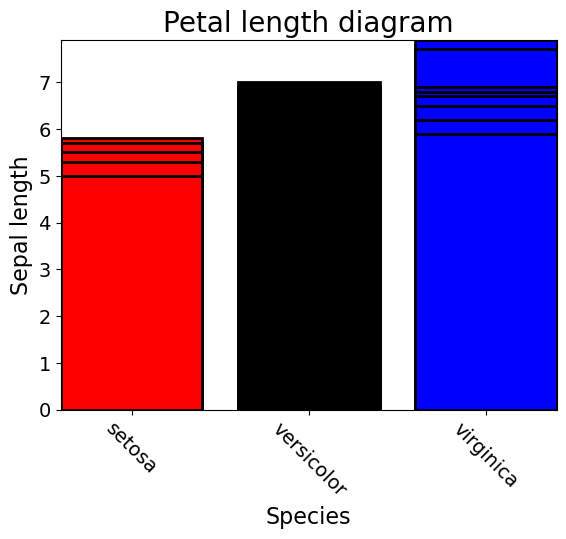

In [234]:
fig, ax = plt.subplots()

ax.set_title(
    'Petal length diagram',
    fontsize=20,
    loc='center'
)

ax.set_xlabel('Species', fontsize=16)
ax.set_ylabel('Sepal length', fontsize=16)

plt.xticks(rotation=315, size=14)
plt.yticks(size=14)

params = data['species'].unique().tolist()
colors = ['red', 'black', 'blue']
for i, param in enumerate(params):
    ax.bar(
        data[data['species'] == param]['species'],
        data[data['species'] == param]['sepal_length'],
        color=colors[i],
        zorder=1,
        edgecolor='black',
        linewidth=2,
    )

plt.margins(0, 0)
plt.show()

C:\Users\Alexey\AppData\Local\Temp\ipykernel_12764\4078368468.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



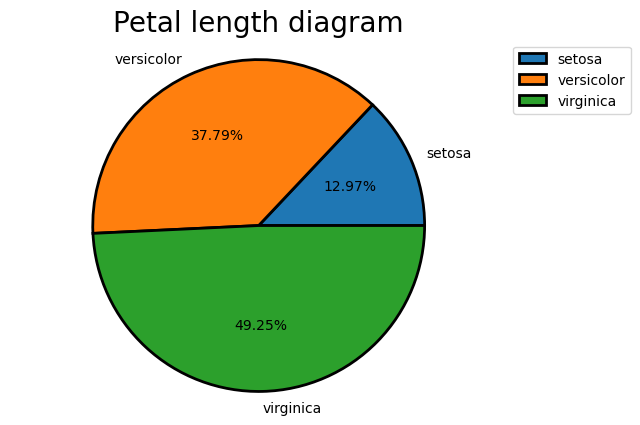

In [235]:
fig, ax = plt.subplots()

x = []
for param in params:
    x.append(data[data['species'] == param].mean().values[2])

ax.pie(x, labels=params, autopct='%1.2f%%',
       wedgeprops={'lw': 2, 'ls': '-', 'edgecolor': "k"})
ax.axis('equal')
# fig.set_figheight(700)
ax.set_title(
    'Petal length diagram',
    fontsize=20,
    loc='center'
)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

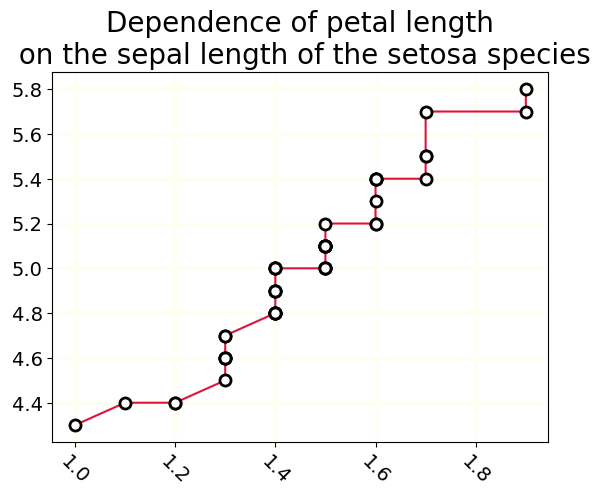

In [239]:
fig, ax = plt.subplots()
ax.set_title(
    'Dependence of petal length\n on the sepal length of the setosa species',
    fontsize=20,
    loc='center'
)
ax.plot(
    data[data['species'] == 'setosa']['petal_length'].sort_values(),
    data[data['species'] == 'setosa']['sepal_length'].sort_values(),
    marker='.', color='crimson',
    markerfacecolor='white', markeredgecolor='black', markeredgewidth=2, markersize=16
)
ax.grid(zorder=1, linewidth=2, color='ivory')
plt.xticks(rotation=315, size=14)
plt.yticks(size=14)

plt.show()